# Climate Change Belief Analysis 2022

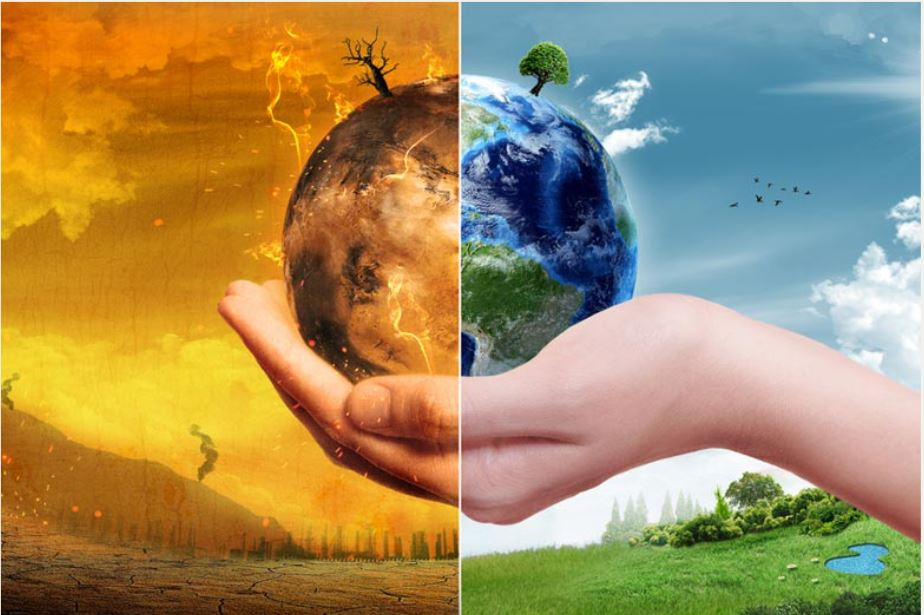

# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Importing Libraries](#importing_libraries) <br>
    1.2. [Loading Data](#loading_data) <br><br>
    
2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Checking for Null Entries](#null_entries) <br>
    2.2 [Checking for Empty Strings](#empty_strings) <br>
    2.3 [Masking User Handles](#user_handles) <br>
    2.4 [Replacing URLs](#urls) <br>
    2.5 [Delete Punctuations, Numbers and Special Characters](#punctuations) <br>
    2.6 [Removing Stopwords, Converting Words to Lowercase and Lemmatizing](#stopwords) <br><br>

3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [Handling Imbalance Datasets](#imbalancedata) <br>
     <font color=white>.....</font>3.1.1. [Upsample Technique](#upsample) <br>
     <font color=white>.....</font>3.1.2. [Downsample Technique](#downsample) <br>
     <font color=white>.....</font>3.1.2. [Synthetic Minority Oversampling Technique](#smote) <br>
    3.2 [Creating WordCloud](#wordcloud) <br><br>
   
4. [Model Building](#model) <br>
    4.1 [Creating Pipeline for Fitting Our Models](#pipeline) <br>
    4.2 [Logistic Regression Model Without Resampling](#logreg) <br>
    4.3 [Logistic Regression Model With Upsampling](#(logregupsample) <br>
    4.4 [Logistic Regression Model With Downsampling](#logregdownsample) <br>
    4.5 [Logistic Regression Model with SMOTE Technique](#logregsmote) <br><br>
    
5. [Conclusion and Recommendation](#conclusion_and_recommendation) <br>
    5.1 [Conclusion](#conclusion) <br>
    5.2 [Recommendation](#recommendation) <br><br>

6. [Appendix](#appendix) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

### 1.1 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

In [206]:
#!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

from sklearn.utils import resample

### 1.2 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

The dataframes will be copied so as to make sure the initial dataframes do not change. 

In [3]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

Let’s check the first few rows of the both datasets.

In [4]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are not masked. We will maske them as *@user*.

- All URLs will be replaced with the word *url*.

- We also get rid of the punctuations, numbers and special characters as they add no value to the machine learning process.

- Most of the smaller words do not add much value. For example, ‘of’, ‘his’, ‘all’. These are called *stopwords*. We will remove them from our data.

- Once we have executed the above steps, we can split every Tweet into individual words. i.e tokens, which is an essential step in any NLP task.

- In the 5th tweet of the train dataset, there is a word ‘racist’. We might also have terms like racism, race, racial, racialist etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘race’, then we can reduce the total number of unique words in our data without losing a significant amount of information. This process is known as *lemmatization*.

- Converting all text to one case. Lowercase will be used here.

But first, let us start by doing the most basic data cleaning processes which include;
- Checking if there are any nulls in the datasets
- Checking if any strings in the datasets are empty

### 2.1 Checking for Null Entries <a id="null_entries"></a>
[Table of Contents](#contents)

In [6]:
# checking nulls in the train set
df_train2.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [7]:
# checking nulls in the test set
df_test2.isnull().sum()

message    0
tweetid    0
dtype: int64

Both datasets have no *Null* values, therefore, no action needs to be taken at this stage.

### 2.2 Checking for Empty Strings<a id="empty_strings"></a>
[Table of Contents](#contents)

In [8]:
# checking for empty strings in the train dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,sentiment,message,tweetid in df_train2.itertuples():  
    # only loop through string values
    if type(message)==str:            
        # check for whitespace
        if message.isspace():         
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


In [9]:
# checking for empty strings in the test dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,message,tweetid in df_test2.itertuples():  
    # only loop through string values
    if type(message)==str: 
        # check for whitespace
        if message.isspace():
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


Both datasets have no empty strings, therefore, no action needs to be taken at this stage.

### 2.3 Masking User Handles<a id="user_handles"></a>
[Table of Contents](#contents)

We are masking the Twitter handles with @user because;
- of privacy concerns. 
- they hardly give any information about the nature of the tweet/sentiments
- having different handle names will add to the total number of unique words in our data 

In [10]:
# masking handles names to @user on train dataset
# define the regular pattern to recognize user handles 
regex_pattern = r'\B@\w+'
# define the substitute text that will be used to replace handle name
sub_text = r'@user'

# replace user handle with substitute text on train dataset
df_train2['message'] = df_train2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)


# replace user handle with substitute text on test dataset
df_test2['message'] = df_test2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)

Let us check if the masking was successful. 

In [11]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @user: Researchers say we have three years ...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @user: It's 2016, and a racist, sexist, cli...",466954


In [12]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@user @user @user @user \nPutin got to you too...,476263
4,RT @user: 'Female orgasms cause global warming...,872928


We have successfully masked the user handles for both the train and test dataframes. 

### 2.4 Replacing URLs<a id="urls"></a>
[Table of Contents](#contents)

URLs will be replaced with the word *url*;
- so as to reduce the number of uniue values
- because they add no value to our machine learning process. 

In [13]:
# replacing URLs with the word url on train and test datasets
# define the regular pattern to recognize the URLs
regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
# define the substitute text that will be used to replace the URLs
sub_text = r'url'

# replace URLs with substitute text on train datatset
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace URLs with substitute text on test datatset
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.5 Delete Punctuations, Numbers and Special Characters<a id="punctuations"></a>
[Table of Contents](#contents)

This step is necessary because punctuations, numbers and special characters don't help in differentiating different kinds of tweets. If we skip this step, there is a higher chance that we will be working with noisy and inconsistent data. We will be replacing everything except characters and hashtags with spaces.

In [14]:
# remove special characters, numbers, punctuations on train and test datasets
# define the regular pattern 
regex_pattern = r'[^a-zA-Z#]'
# define the substitute text as a whitespace
sub_text = r' '

# replace the characters on train dataframe
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace the characters on test dataframe
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.6 Removing Stopwords, Converting Words to Lowercase, and Lemmatizing<a id="stopwords"></a>
[Table of Contents](#contents)

Stopwords do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords have been defined by the Natural Language Toolkit (nltk) library so we will start by downloading them.

Lemmatization is defined as "doing things properly using vocabulary and morphological analysis of words"<sup>1</sup>. This process returns the base form of a word, i.e, the *lemma*.
Example: Better - Good. For this step,  we will download WordNet from nltk. WordNet is a lexical database of Englishwhich helps find conceptual relationships between words.<sup>2</sup>

In [221]:
# downloading stopwrods from nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [15]:
# initialize set of stopwords from English dictionary
stop_words = set(stopwords.words("english")) 
# initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to clean the tweets
def clean_tweet(text):
    # convert the text to lowercase
    text = text.lower()
    # lemmatization + tokenization process
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    # removing stopwords
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

# cleaning train dataset
df_train2['cleaned_message'] = df_train2.message.apply(lambda x: clean_tweet(x))

# cleaning test dataset
df_test2['cleaned_message'] = df_test2.message.apply(lambda x: clean_tweet(x))

Let us have a look at what the clean data looks like!

In [16]:
# checking the preprossed train dataframe 
df_train2.head()

,sentiment,message,tweetid,cleaned_message
0,1,PolySciMajor EPA chief doesn t think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It s not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,2,RT user Researchers say we have three years ...,698562,rt user researcher say three year act climat...
3,1,#TodayinMaker# WIRED was a pivotal year...,573736,#todayinmaker# wire wa pivotal year war...
4,1,RT user It s and a racist sexist cli...,466954,rt user racist sexist climate change...


In [17]:
# checking the preprossed test dataframe 
df_test2.head()

,message,tweetid,cleaned_message
0,Europe will now be looking to China to make su...,169760,europe look china make sure alone fight climat...
1,Combine this with the polling of staffers re c...,35326,combine poll staffer climate change woman rig...
2,The scary unimpeachable evidence that climate...,224985,scary unimpeachable evidence climate change a...
3,user user user user Putin got to you too ...,476263,user user user user putin get jill tru...
4,RT user Female orgasms cause global warming...,872928,rt user female orgasm cause global warm ...


The preprocessed dataframes look good! We will not move to Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

In this step, we will start by checking the News, Pro, Neutral and Anti messages frequency distribution in the train dataframe.  

In [18]:
# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

print('Number of news tagged sentences is:     {}'.format(len(news)))
print('Number of pro tagged sentences is:      {}'.format(len(pro)))
print('Number of neutral tagged sentences is:  {}'.format(len(neutral)))
print('Number of anti tagged sentences is:     {}'.format(len(anti)))
print('Total length of the data is:            {}'.format(df_train2.shape[0]))

Number of news tagged sentences is:     3640
Number of pro tagged sentences is:      8530
Number of neutral tagged sentences is:  2353
Number of anti tagged sentences is:     1296
Total length of the data is:            15819


Here is a graphical representation of the same;

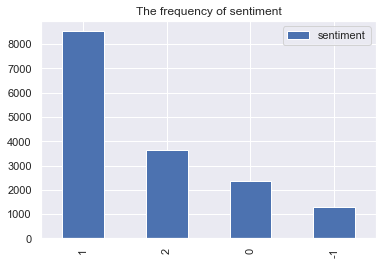

In [19]:
df_train2['sentiment'].value_counts().plot(kind ='bar')
#labels = df_train2['sentiment'].unique()
#label_title = ['pro', 'news', 'neutral', 'anti']
plt.title ('The frequency of sentiment')
#plt.xticks(labels)
plt.legend()
plt.show()

Considering the size of the dataset, the count of sentenses do not seem to be equally distributed between **news, pro, neutral** and **anti**.  **Pro** has the most number of Tweets followed by **news** then **neutral** and finally **anti**. This means that majority of the tweets in this data set support the belief that climate-change is man-made while a majority of the Tweets are opposed to this. 

### 3.1 Handling Imbalanced Datasets<a id="imbalancedata"></a>
[Table of Contents](#contents)

This uneven distribution of sentiments will affect the accuracy of our model(s). To solve this imbalance, resampling method  (Downscalling and Upscalling), which will involve modifying the number of observations in each class, will be used.

#### 3.1.1 Upsample Technique<a id="upsample"></a>
[Table of Contents](#contents)

In [20]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# upsample the minority classes
news_upsample = resample(news, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

neutral_upsample = resample(neutral, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

anti_upsample = resample(anti, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

# concatenate the upsampled dataframe
df_train2_upsample = pd.concat([news_upsample, pro, neutral_upsample ,anti_upsample])

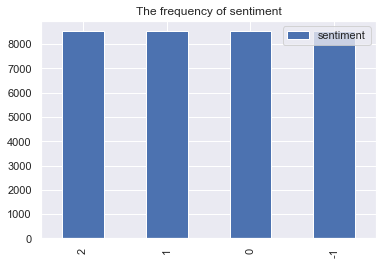

In [21]:
df_train2_upsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

#### 3.1.2 Downsample Technique<a id="downsample"></a>
[Table of Contents](#contents)

In [25]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# downsample the minority classes

news_downsample = resample(news, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

pro_downsample = resample(pro, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

neutral_downsample = resample(neutral, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)


# concatenate the downsampled dataframe
df_train2_downsample = pd.concat([news_downsample, pro_downsample, neutral_downsample ,anti])

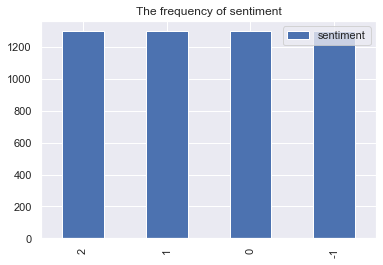

In [26]:
df_train2_downsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

#### 3.1.3 SMOTE Technique<a id="smote"></a>
[Table of Contents](#contents)

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [234]:
#pip install imblearn

In [27]:
#Importing the libraries requried to implement the SMOTE techniques
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
# Implementing the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(df_train2['cleaned_message'].values.astype(str))

#Applying the fit_transform method of the count vectorizer on the train data
X_test_count = vect.fit_transform(df_test2['cleaned_message'].values.astype(str))

#Using the first 10,000 features of the train data from the vectorizer
vect_10000 = CountVectorizer(lowercase=False, stop_words='english', max_features=10000, analyzer='word', ngram_range=(1, 3))
X_vec = vect_10000.fit_transform(df_train2['cleaned_message'].values.astype(str))

#Using the first 10,000 features of the test data from the vectorizer
X_test_vec = vect_10000.fit_transform(df_test2['cleaned_message'].values.astype(str))

# Converting the vectorized words of the train and test dataset to an array and assigning the y_train set
X_smote = X_vec.toarray()
X_test_smote = X_test_vec.toarray()
y_smote = df_train2['sentiment']

#Converting the arrays into a Pandas DataFrame
df_X_test = pd.DataFrame(data=X_test_smote)
df_X = pd.DataFrame(data=X_smote)

#### Applying the SMOTE technique with a random state of 2

In [78]:
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(df_X, y_smote.ravel())

In [36]:
(X_train_smote.shape, y_train_smote.shape)

((34120, 10000), (34120,))

### 3.2 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

We can now analyse the data to get further understanding of it by plotting word clouds for news, pro, netral and anti tweet messages from our train dataset and see which words occur the most.

A word cloud is a collection of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a dataset. We will used the WordCloud library for this scenario. 

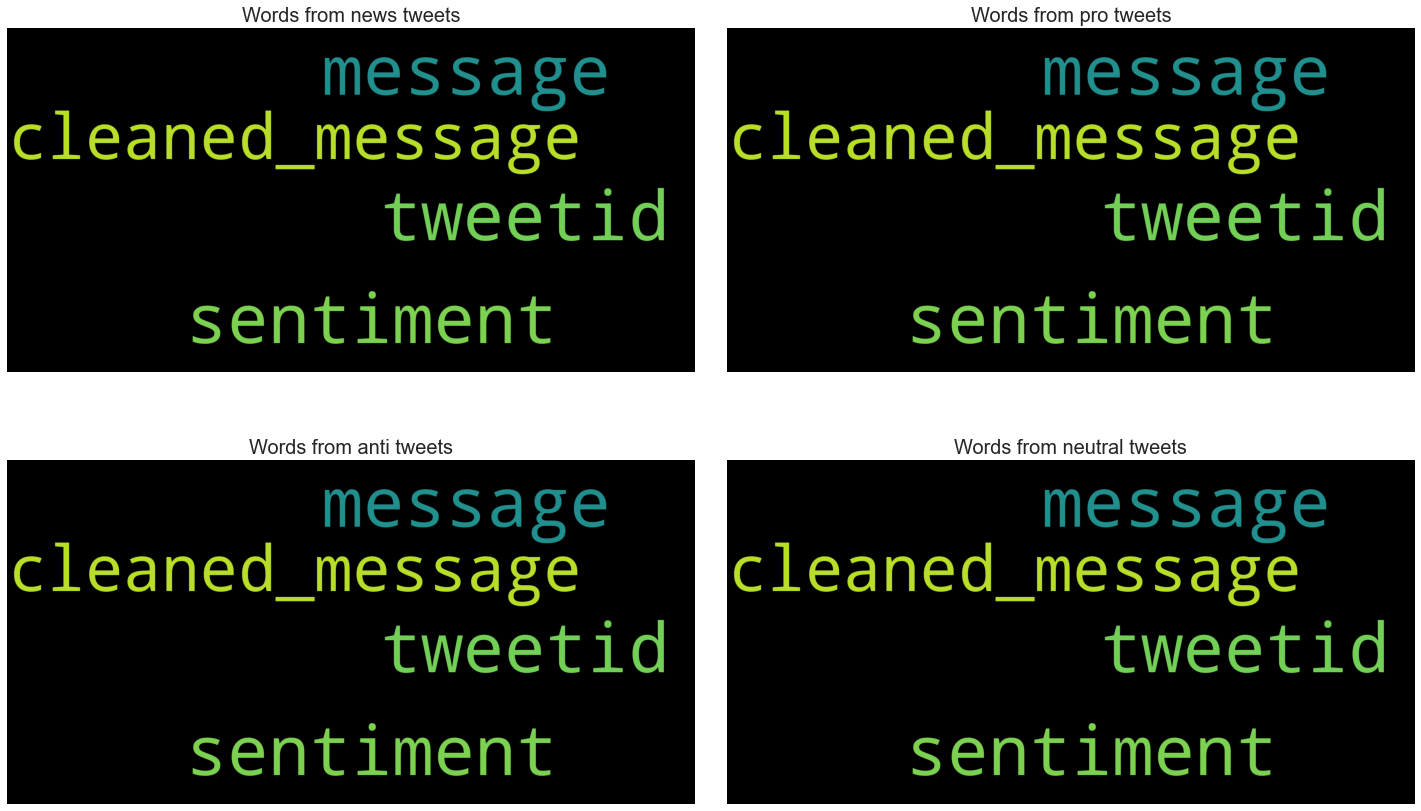

In [22]:
news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

def plot_wordcloud(news, pro, neutral, anti):
    news = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=1,
        collocations=False,
        normalize_plurals=False
    ).generate(' '.join(news))

    
    pro = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=1,
        collocations=False,
        normalize_plurals=False
    ).generate(' '.join(pro))



    neutral = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=1,
        collocations=False,
        normalize_plurals=False
    ).generate(' '.join(neutral))


    anti = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=1,
        collocations=False,
        normalize_plurals=False
    ).generate(' '.join(anti))


    fig, axs = plt.subplots(2, 2, figsize = (20, 12))
    # fig.suptitle('Clouds of polar words', fontsize = 30)
    fig.tight_layout(pad = 0)

    axs[0, 0].imshow(news)
    axs[0, 0].set_title('Words from news tweets', fontsize = 20)
    axs[0, 0].axis('off')
    # axs[0, 0].tight_layout(pad = 1)

    axs[0, 1].imshow(pro)
    axs[0, 1].set_title('Words from pro tweets', fontsize = 20)
    axs[0, 1].axis('off')
    # axs[0, 1].tight_layout(pad = 1)


    # axs[1, 0].tight_layout(pad = 1)
    axs[1, 0].imshow(anti)
    axs[1, 0].set_title('Words from anti tweets', fontsize = 20)
    axs[1, 0].axis('off')

    axs[1, 1].imshow(neutral)
    axs[1, 1].set_title('Words from neutral tweets', fontsize = 20)
    axs[1, 1].axis('off')

    # axs[1, 0].tight_layout(pad = 1)
    plt.savefig('joint_cloud.png')


plot_wordcloud(news, pro, neutral, anti)

From this graphical representation, we can see that the two palceholder values we used during data preporocessing, *@user* and *@url* have weight on the word count yet they do not add any value to our machine learning process. We will therefore delete them on both train and test dataframes. 

In [23]:
# replace @user and url with whitespace on train dataframe
df_train2['cleaned_message'] = df_train2['cleaned_message'].replace(to_replace = '@user', value = ' ', regex = True)
df_train2['cleaned_message'] = df_train2['cleaned_message'].replace(to_replace = 'url', value = ' ', regex = True)

# replace @user and urlwith whitespace on test dataframe
df_test2['cleaned_message'] = df_test2['cleaned_message'].replace(to_replace = '@user', value = ' ', regex = True)
df_test2['cleaned_message'] = df_test2['cleaned_message'].replace(to_replace = 'url', value = ' ', regex = True)

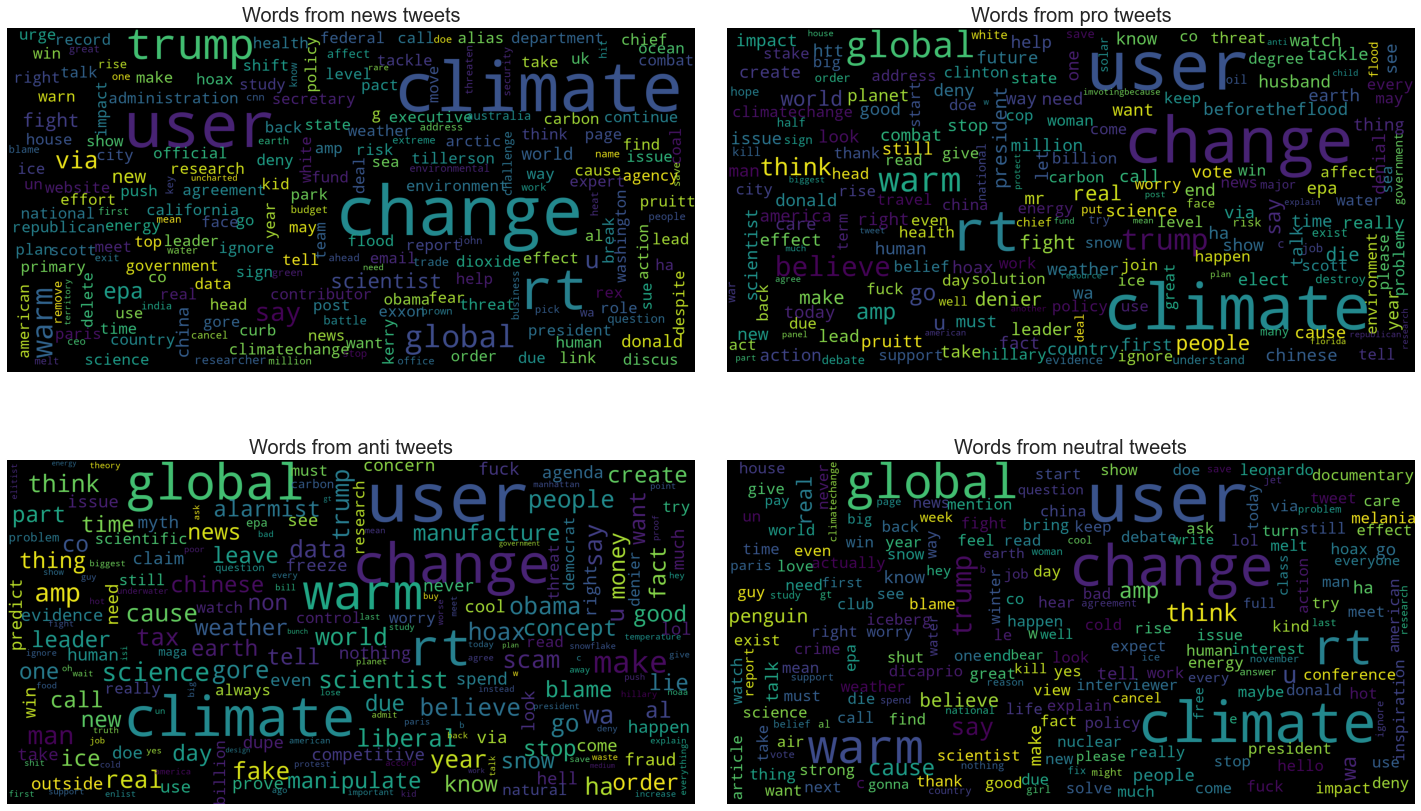

In [24]:
# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

plot_wordcloud(news, pro, neutral, anti)

## 4. Model Building<a id="model"></a>
[Table of Contents](#contents)

### 4.1 Creating Pipelines for fitting  Our Models<a id="pipeline"></a>
[Table of Contents](#contents)

In [37]:
#Model packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [40]:
LogReg_pipepline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('LG',LogisticRegression()),
])
#Fitting the model with train dataset
LogReg_pipepline.fit(X_train, y_train)  

C:\Users\USER\anaconda3_\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('LG', LogisticRegression())])

### 4.2 Logistic Regression Model Without Resampling<a id="logreg"></a>
[Table of Contents](#contents)

In [38]:
X = df_train2['cleaned_message']
X_testset = df_test2['cleaned_message']
y = df_train2['sentiment']

In [39]:
#Splitting the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

In [41]:
# Getting predicions from the X_test
predictions = LogReg_pipepline.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.79      0.32      0.46       272
           0       0.68      0.35      0.47       477
           1       0.71      0.90      0.79      1726
           2       0.74      0.65      0.69       689

    accuracy                           0.72      3164
   macro avg       0.73      0.56      0.60      3164
weighted avg       0.72      0.72      0.69      3164

0.7161820480404552


In [74]:
y_pred_unbalance = LogReg_pipepline.predict(X_testset)

#Making the tweetid to be the idex
test_unbalance = df_test2.set_index('tweetid')

final_test_unbalance = test_unbalance.index

#Creating the submission Dataframe
Final_Table_unbalance = {'tweetid': final_test_unbalance, 'sentiment':np.round(y_pred_unbalance, 0)}
submission_unbalance = pd.DataFrame(data=Final_Table_unbalance)
submission_unbalance = submission_unbalance[['tweetid', 'sentiment']]

#wrting csv file
submission_unbalance.to_csv("TestSubmission_LogisticRegression_unbalance.csv",index  = False) 
submission_unbalance.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,2
3,476263,-1
4,872928,0


### 4.3 Logistic Regression Model With Upsampling<a id="logregupsample"></a>
[Table of Contents](#contents)

In [49]:
X_upsample = df_train2_upsample['cleaned_message']
y_upsample = df_train2_upsample['sentiment']

In [50]:
#Splitting the train dataset
X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2, random_state = 20)

In [51]:
lg_upsample = LogReg_pipepline.fit(X_train_upsample, y_train_upsample) 

C:\Users\USER\anaconda3_\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Getting predicions from the X_test
predictions_upsample = LogReg_pipepline.predict(X_test_upsample)
#Pritting the classification report
print(metrics.classification_report(y_test_upsample, predictions_upsample))
# Print the overall accuracy
print(metrics.accuracy_score(y_test_upsample, predictions_upsample))

              precision    recall  f1-score   support

          -1       0.93      0.98      0.95      1691
           0       0.88      0.91      0.90      1663
           1       0.89      0.73      0.80      1767
           2       0.87      0.95      0.91      1703

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824

0.8917057444314185


In [75]:
y_pred_upsample = lg_upsample.predict(X_testset)

#Making the tweetid to be the idex
test_upsample = df_test2.set_index('tweetid')

final_test_upsample = test_upsample.index

#Creating the submission Dataframe
Final_Table_upsample = {'tweetid': final_test_upsample, 'sentiment':np.round(y_pred_upsample, 0)}
submission_upsample = pd.DataFrame(data=Final_Table_upsample)
submission_upsample = submission_upsample[['tweetid', 'sentiment']]

#wrting csv file
submission_upsample.to_csv("TestSubmission_LogisticRegression_upsample.csv",index  = False) 
submission_upsample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,2
3,476263,-1
4,872928,0


### 4.4 Logistic Regression Model With Downsampling<a id="logregdownsample"></a>
[Table of Contents](#contents)

In [53]:
X_downsample = df_train2_downsample['cleaned_message']
y_downsample = df_train2_downsample['sentiment']

In [54]:
#Splitting the train dataset
X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample = train_test_split(X_downsample, y_downsample, test_size=0.2, random_state = 20)

In [55]:
lg_downsample = LogReg_pipepline.fit(X_train_downsample, y_train_downsample) 

In [56]:
# Getting predicions from the X_test
predictions_downsample = LogReg_pipepline.predict(X_test_downsample)
#Pritting the classification report
print(metrics.classification_report(y_test_downsample, predictions_downsample))
# Print the overall accuracy
print(metrics.accuracy_score(y_test_downsample, predictions_downsample))

              precision    recall  f1-score   support

          -1       0.72      0.72      0.72       254
           0       0.73      0.66      0.69       253
           1       0.64      0.62      0.63       258
           2       0.70      0.79      0.74       272

    accuracy                           0.70      1037
   macro avg       0.70      0.70      0.70      1037
weighted avg       0.70      0.70      0.70      1037

0.6991321118611379


### 4.5 Logistic Regression Model With SMOTE Technique<a id="logregsmote"></a>
[Table of Contents](#contents)

In [57]:
#Splitting the train dataset
X_train_smote1, X_test_smote1, y_train_smote1, y_test_smote1 = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state = 20)

In [58]:
X_test_smote1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
LogReg_smote = LogisticRegression()

In [60]:
lg_smote = LogReg_smote.fit(X_train_smote1, y_train_smote1) 

C:\Users\USER\anaconda3_\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Getting predicions from the X_test
predictions_smote = lg_smote.predict(X_test_smote1)
#Pritting the classification report
print(metrics.classification_report(y_test_smote1, predictions_smote))
# Print the overall accuracy
print(metrics.accuracy_score(y_test_smote1, predictions_smote))

              precision    recall  f1-score   support

          -1       0.65      0.64      0.64      1701
           0       0.54      0.55      0.54      1635
           1       0.81      0.75      0.78      1755
           2       0.69      0.74      0.71      1733

    accuracy                           0.67      6824
   macro avg       0.67      0.67      0.67      6824
weighted avg       0.67      0.67      0.67      6824

0.6702813599062134


In [69]:
y_pred_smote = lg_smote.predict(df_X_test)

#Making the tweetid to be the idex
test_smote = df_test2.set_index('tweetid')

final_test_smote = test_smote.index

#Creating the submission Dataframe
Final_Table_smote = {'tweetid': final_test_smote, 'sentiment':np.round(y_pred_smote, 0)}
submission_smote = pd.DataFrame(data=Final_Table_smote)
submission_smote = submission_smote[['tweetid', 'sentiment']]

#wrting csv file
submission_smote.to_csv("TestSubmission_LogisticRegression_smote.csv",index  = False) 

In [70]:
submission_smote.head()

,tweetid,sentiment
0,169760,2
1,35326,2
2,224985,2
3,476263,2
4,872928,2


## 5. Conclusion and Recommendation<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)

### 5.1 Conclusion<a id="conclusion"></a>
[Table of Contents](#contents)

### 5.2 Recommendation<a id="recommendation"></a>
[Table of Contents](#contents)

## 6. Appendix<a id="appendix"></a>
[Table of Contents](#contents)

1. Stemming and lemmatization - Stanford NLP Group: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. Source code for nltk.corpus.reader.wordnet: https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html